# This notebook just tries to make a perfect "delay line" on a fast pulse to see how it behaves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as spec

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Nanoseconds
rise_time = 3
fall_time = 30

def pulse(t, t0):
    fast_rise = (1 + spec.erf((t - t0) / rise_time)) / 2
    exp_decay = np.exp(-(t - t0) / fall_time)
    pulse = fast_rise * exp_decay

    return pulse

In [3]:
t = np.linspace(0, 200, num=1000)
t0 = 20
my_pulse = pulse(t, 30) + 0.1

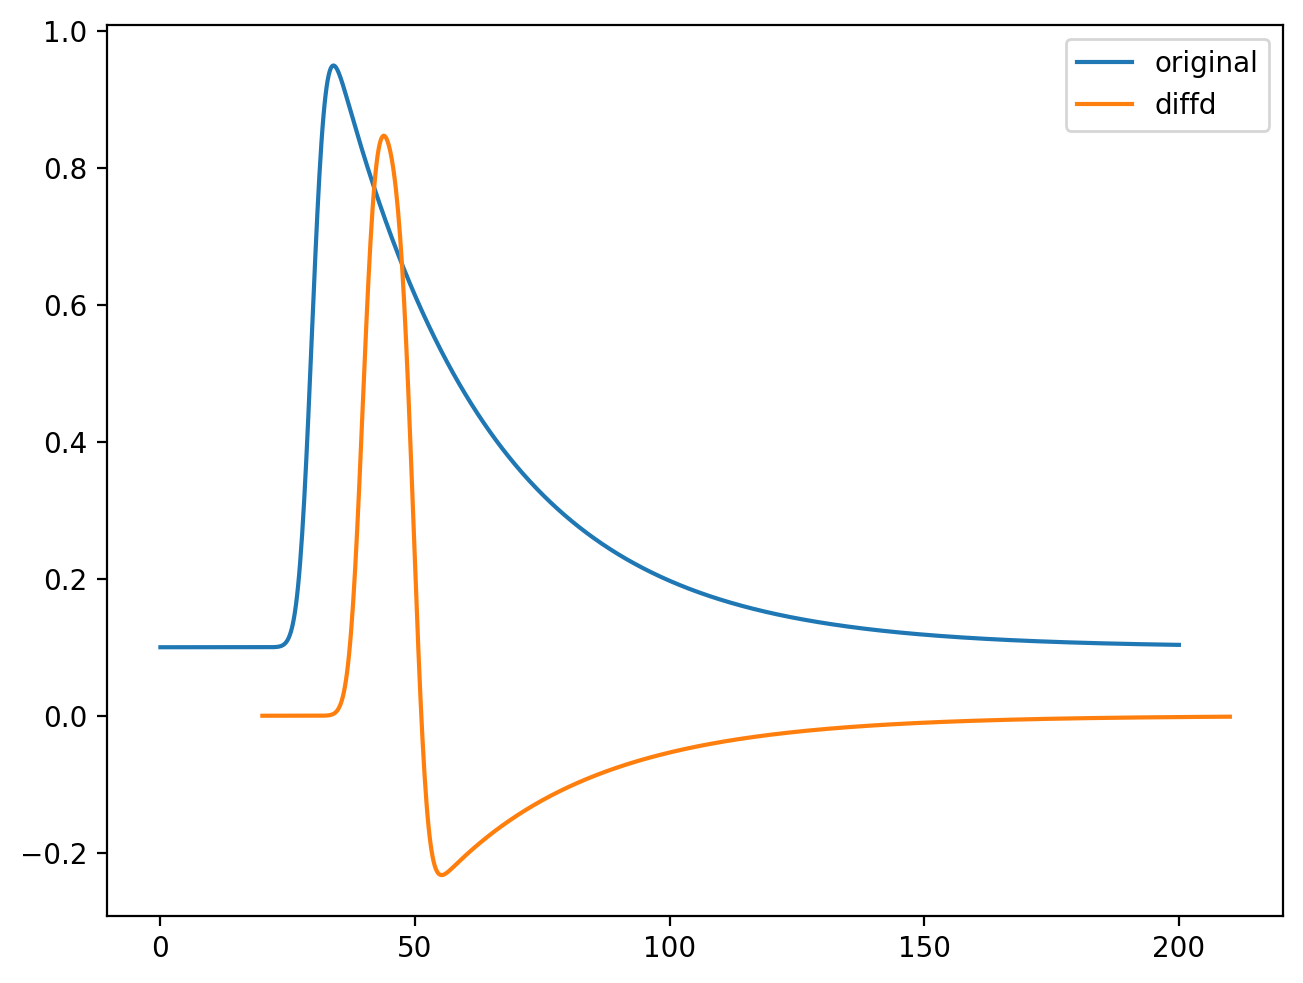

In [4]:
shift = np.argmin(np.abs(t - 10))
diffed = -my_pulse[:-shift] + my_pulse[shift:]

fig, ax = plt.subplots(layout='constrained')
ax.plot(t, my_pulse, label='original')
ax.plot(t[shift:] + t[shift], diffed, label='diffd')
ax.legend()
plt.show()